In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
# word cloud library
from wordcloud import WordCloud
# matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


In [2]:
#1
data_athlete=pd.read_csv("../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
df1=data_athlete.copy()
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
noc=pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')
df2=noc.copy()
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
df=df1.merge(df2,on='NOC',how='left')

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [7]:
df.shape

(271116, 17)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
df.Name.unique()

array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ..., 'Andrzej ya',
       'Piotr ya', 'Tomasz Ireneusz ya'], dtype=object)

In [11]:
#2.
#sns.scatterplot(x="Year",y="Name", data=df)
df.Name.unique()

array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ..., 'Andrzej ya',
       'Piotr ya', 'Tomasz Ireneusz ya'], dtype=object)

In [12]:
df.Name.value_counts(dropna=False).to_frame()

,Name
Robert Tait McKenzie,58
Heikki Ilmari Savolainen,39
"Joseph ""Josy"" Stoffel",38
Ioannis Theofilakis,36
Takashi Ono,33
...,...
Tatyana Vasilyevna Kalmykova,1
Mariya Lvovna Kalmykova,1
Christine Kalmer,1
"Joannis ""Jannis"" Kalmazidis",1


In [13]:
df.Year.unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896])

### df.groupby('Name')['Year'].count().nlargest(37).reset_index()

In [14]:
df.groupby('Year')['Name'].count().nlargest(37).reset_index()

,Year,Name
0,1992,16413
1,1988,14676
2,2000,13821
3,1996,13780
4,2016,13688
5,2008,13602
6,2004,13443
7,2012,12920
8,1972,11959
9,1984,11588


In [15]:
participants=df.groupby('Year')['Name'].count().reset_index()
participants.rename(columns={'Name':'Athlets'},inplace=True)
participants

,Year,Athlets
0,1896,380
1,1900,1936
2,1904,1301
3,1906,1733
4,1908,3101
5,1912,4040
6,1920,4292
7,1924,5693
8,1928,5574
9,1932,3321


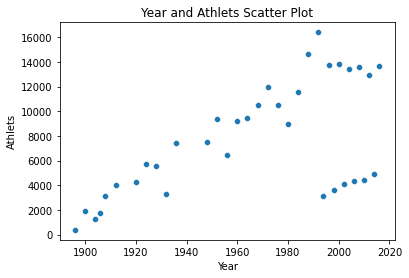

In [16]:
sns.scatterplot(x='Year',y='Athlets',data=participants)
plt.title('Year and Athlets Scatter Plot')
plt.show()

In [17]:
participants=df.groupby(['Year','Season'])['Name'].count().reset_index()
participants.rename(columns={'Name':'Athlets'},inplace=True)
participants

,Year,Season,Athlets
0,1896,Summer,380
1,1900,Summer,1936
2,1904,Summer,1301
3,1906,Summer,1733
4,1908,Summer,3101
5,1912,Summer,4040
6,1920,Summer,4292
7,1924,Summer,5233
8,1924,Winter,460
9,1928,Summer,4992


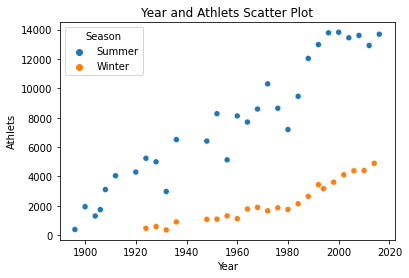

In [18]:
#3.
sns.scatterplot(x='Year',y='Athlets',hue='Season',data=participants)
plt.title('Year and Athlets Scatter Plot')
plt.show()

In [19]:
import plotly.graph_objs as go
# Creating trace1
trace1 = go.Scatter(
                    x = participants.Year.where(participants["Season"]=='Summer'),
                    y = participants.Athlets,
                    mode = "lines+markers",
                    name = "Summer Athlets",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    #text= df.participants)
                                          )
# Creating trace2
trace2 = go.Scatter(
                    x = participants.Year.where(participants["Season"]=='Winter'),
                    y = participants.Athlets,
                    mode = "lines+markers",
                    name = "Winter Athlets",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    #text= participants)
                                       )
data = [trace1, trace2]
layout = dict(title = 'Year and Athlets Scatter Plot',
              xaxis= dict(title= 'Year and Athlets Scatter Plot',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [20]:
#4.
import plotly.graph_objs as go
# Creating trace1
trace1 = go.Scatter(
                    x = participants.Year.where(participants["Season"]=='Summer'),
                    y = participants.Athlets,
                    mode = "lines+markers",
                    name = "Summer Athlets",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    #text= df.participants)
                                          )
# Creating trace2
trace2 = go.Scatter(
                    x = participants.Year.where(participants["Season"]=='Winter'),
                    y = participants.Athlets,
                    xaxis='x2',
                    yaxis='y2',
                    mode = "lines+markers",
                    name = "Winter Athlets",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    #text= participants)
                                       )
data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    title = 'Year and Athlets Scatter Plot'
)
fig = dict(data = data, layout = layout)
iplot(fig)

In [21]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [22]:
#5.
participants=df.groupby('Games')['Name'].count().reset_index()
participants.rename(columns={'Name':'Athlets'},inplace=True)
participants

,Games,Athlets
0,1896 Summer,380
1,1900 Summer,1936
2,1904 Summer,1301
3,1906 Summer,1733
4,1908 Summer,3101
5,1912 Summer,4040
6,1920 Summer,4292
7,1924 Summer,5233
8,1924 Winter,460
9,1928 Summer,4992


In [23]:
import plotly.express as px

fig = px.bar(participants, x='Games', y='Athlets')
fig.show()

In [24]:
#6.
participants=df.groupby('Season')['Name'].count().reset_index()
participants.rename(columns={'Name':'Athlets'},inplace=True)
participants

,Season,Athlets
0,Summer,222552
1,Winter,48564


In [25]:
import plotly.express as px

fig = px.box(participants, y="Athlets")
fig.show()

In [26]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


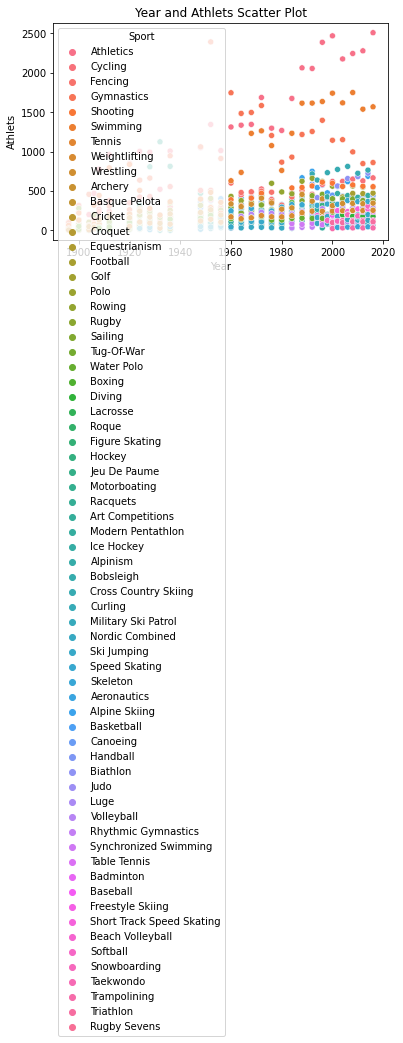

In [27]:
#7.
participants=df.groupby(['Year','Sport'])['Name'].count().reset_index()
participants.rename(columns={'Name':'Athlets'},inplace=True)
participants
sns.scatterplot(x='Year',y='Athlets',hue='Sport',data=participants)
plt.title('Year and Athlets Scatter Plot')
plt.show()

In [28]:
import plotly.express as px

fig = px.scatter(participants, x="Year", y="Athlets", color="Sport", symbol="Sport")
fig.show()

In [29]:
#8.
participants=df.groupby(['Year','Season','Sport'])['Name'].count().reset_index()
participants.rename(columns={'Name':'Athlets'},inplace=True)
participants


,Year,Season,Sport,Athlets
0,1896,Summer,Athletics,106
1,1896,Summer,Cycling,41
2,1896,Summer,Fencing,15
3,1896,Summer,Gymnastics,97
4,1896,Summer,Shooting,65
...,...,...,...,...
901,2016,Summer,Triathlon,110
902,2016,Summer,Volleyball,283
903,2016,Summer,Water Polo,258
904,2016,Summer,Weightlifting,255


In [30]:
import plotly.express as px

fig = px.scatter(participants, x="Sport", y="Athlets", color="Season", symbol="Season")
fig.show()

In [31]:
#9.
participants=df.groupby(['Games'])['Name'].count().reset_index()
participants.rename(columns={'Name':'Athlets'},inplace=True)
participants

,Games,Athlets
0,1896 Summer,380
1,1900 Summer,1936
2,1904 Summer,1301
3,1906 Summer,1733
4,1908 Summer,3101
5,1912 Summer,4040
6,1920 Summer,4292
7,1924 Summer,5233
8,1924 Winter,460
9,1928 Summer,4992


In [32]:
participants1=df.groupby(['Sport'])['Name'].count().reset_index()
participants1.rename(columns={'Name':'Athlets'},inplace=True)
participants1

,Sport,Athlets
0,Aeronautics,1
1,Alpine Skiing,8829
2,Alpinism,25
3,Archery,2334
4,Art Competitions,3578
...,...,...
61,Tug-Of-War,170
62,Volleyball,3404
63,Water Polo,3846
64,Weightlifting,3937


In [33]:
result=pd.concat([participants,participants1])
result

,Games,Athlets,Sport
0,1896 Summer,380,NaN
1,1900 Summer,1936,NaN
2,1904 Summer,1301,NaN
3,1906 Summer,1733,NaN
4,1908 Summer,3101,NaN
...,...,...,...
61,NaN,170,Tug-Of-War
62,NaN,3404,Volleyball
63,NaN,3846,Water Polo
64,NaN,3937,Weightlifting


In [34]:
import plotly.express as px
fig = px.imshow(result, text_auto=True)
fig.show()

Text(0.5, 1.0, 'Correlation Headmap')

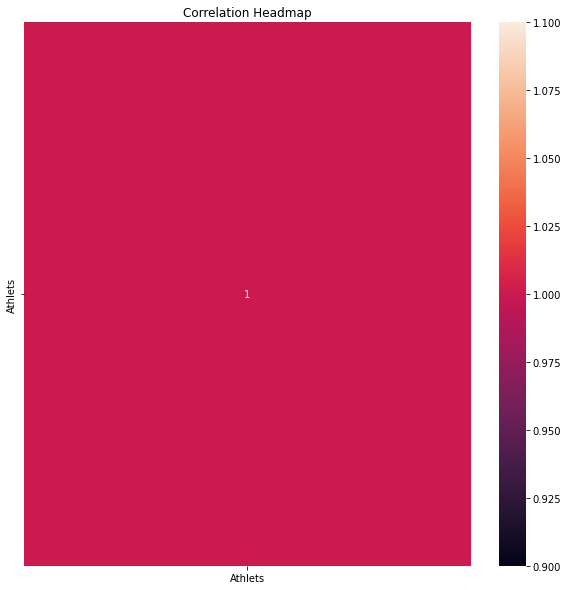

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(result.select_dtypes(include=np.number).corr(),annot=True)
plt.title("Correlation Headmap")

In [36]:
#10.

participants=df.groupby(['Games','Sport','Season'])['Name'].count().reset_index()
participants.rename(columns={'Name':'Athlets'},inplace=True)
participants


,Games,Sport,Season,Athlets
0,1896 Summer,Athletics,Summer,106
1,1896 Summer,Cycling,Summer,41
2,1896 Summer,Fencing,Summer,15
3,1896 Summer,Gymnastics,Summer,97
4,1896 Summer,Shooting,Summer,65
...,...,...,...,...
901,2016 Summer,Triathlon,Summer,110
902,2016 Summer,Volleyball,Summer,283
903,2016 Summer,Water Polo,Summer,258
904,2016 Summer,Weightlifting,Summer,255


In [37]:
df2016 = participants
pie1 = df2016.Athlets
#pie1_list = [float(each.replace(',', '.')) for each in df2016.Athlets]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
pie1_list=df2016.Athlets
labels = df2016.Sport.where( participants["Season"]=='Summer')


In [38]:
df2016 = participants
pie1 = df2016.Athlets
#pie1_list = [float(each.replace(',', '.')) for each in df2016.Athlets]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
pie1_list=df2016.Athlets
labels = df2016.Games.where( participants["Season"]=='Summer')

In [39]:
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Number of Athlets per Game",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)
